In [10]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_nor = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_nor] = diabetes[cols_to_nor].apply(lambda x:(x - x.min() / (x.max() - x.min())))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6.0,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1.0,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8.0,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1.0,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [9]:
assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group' , hash_bucket_size=10)

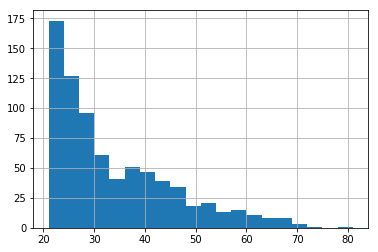

In [11]:
diabetes['Age'].hist(bins=20)

In [13]:
age_bucket = tf.feature_column.bucketized_column(age , boundaries=[20 , 30 , 40 ,50 , 60 , 70, 80])

In [15]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_bucket]

In [16]:
x_data = diabetes.drop('Class' , axis = 1)

In [19]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,6.0,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,1.0,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,8.0,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,1.0,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [20]:
labels = diabetes['Class']

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3, random_state=101)

In [26]:
input_func = tf.estimator.inputs.pandas_input_fn( x = X_train , y = y_train , batch_size=10 , num_epochs=1000 , shuffle= True)

In [27]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols , n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_model_dir': 'C:\\Users\\PERSON~1.SHR\\AppData\\Local\\Temp\\tmp7x3v0cc9', '_session_config': None, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100}


In [28]:
model.train(input_fn=input_func , steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\PERSON~1.SHR\AppData\Local\Temp\tmp7x3v0cc9\model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 208.4
INFO:tensorflow:loss = 6.25778, step = 101 (0.486 sec)
INFO:tensorflow:global_step/sec: 211.373
INFO:tensorflow:loss = 8.04793, step = 201 (0.473 sec)
INFO:tensorflow:global_step/sec: 236.794
INFO:tensorflow:loss = 4.61087, step = 301 (0.429 sec)
INFO:tensorflow:global_step/sec: 231.829
INFO:tensorflow:loss = 4.19518, step = 401 (0.431 sec)
INFO:tensorflow:global_step/sec: 218.666
INFO:tensorflow:loss = 5.62108, step = 501 (0.454 sec)
INFO:tensorflow:global_step/sec: 243.329
INFO:tensorflow:loss = 4.20299, step = 601 (0.406 sec)
INFO:tensorflow:global_step/sec: 251.159
INFO:tensorflow:loss = 3.70708, step = 701 (0.402 sec)
INFO:tensorflow:global_step/sec: 251.913
INFO:tensorflow:loss = 6.28495, step = 801 (0.397 sec)
INFO:tensorflow:global_step/sec: 264.2

In [29]:
eval_input_func = tf.estimator.inputs.pandas_input_fn( x = X_test , y = y_test ,batch_size=10 , num_epochs=1000 , shuffle= False)

In [30]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-12-19-20:06:36
INFO:tensorflow:Restoring parameters from C:\Users\PERSON~1.SHR\AppData\Local\Temp\tmp7x3v0cc9\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-12-19-20:08:01
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.748918, accuracy_baseline = 0.649351, auc = 0.808395, auc_precision_recall = 0.655179, average_loss = 0.520802, global_step = 1000, label/mean = 0.350649, loss = 5.20802, prediction/mean = 0.373858


In [32]:
results

{'accuracy': 0.74891776,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80839503,
 'auc_precision_recall': 0.65517879,
 'average_loss': 0.52080166,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.2080164,
 'prediction/mean': 0.37385818}

In [33]:
pred_input_func = tf.estimator.inputs.pandas_input_fn( x = X_test , batch_size=10 , num_epochs=1 , shuffle=False)

In [34]:
predictions = model.predict(pred_input_func)

In [35]:
list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\PERSON~1.SHR\AppData\Local\Temp\tmp7x3v0cc9\model.ckpt-1000


[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.52800542], dtype=float32),
  'logits': array([ 0.11213905], dtype=float32),
  'probabilities': array([ 0.47199458,  0.52800542], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.65850586], dtype=float32),
  'logits': array([ 0.65664285], dtype=float32),
  'probabilities': array([ 0.34149414,  0.65850586], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.3767916], dtype=float32),
  'logits': array([-0.50318867], dtype=float32),
  'probabilities': array([ 0.6232084 ,  0.37679163], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.34008354], dtype=float32),
  'logits': array([-0.66292197], dtype=float32),
  'probabilities': array([ 0.65991646,  0.34008354], dtype=floa

# DNN CLASSIFIER


In [36]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_model_dir': 'C:\\Users\\PERSON~1.SHR\\AppData\\Local\\Temp\\tmprdnh0j3n', '_session_config': None, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100}


In [38]:
dnn_model.train(input_fn=input_func,steps=1000)

ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _HashedCategoricalColumn(key='Group', hash_bucket_size=10, dtype=tf.string)

# Description 

Deep neural network models (`DNNClassifier`, `DNNRegressor`).
    Continuous features can be directly fed into deep neural network models.
     
    To feed sparse features into DNN models, wrap the column with
    `embedding_column` or `indicator_column`. `indicator_column` is recommended
    for features with only a few possible values. For features with many
    possible values, to reduce the size of your model, `embedding_column` is
    recommended.
    Wide (aka linear) models (`LinearClassifier`, `LinearRegressor`).
    Sparse features can be fed directly into linear models. They behave like an
    indicator column but with an efficient implementation.
      
    It is recommended that continuous features be bucketized before being
    fed into linear models.
    
    Sparse features can be crossed (also known as conjuncted or combined) in
    order to form non-linearities, and then fed into linear models.

In [39]:
embeded_group_col = tf.feature_column.embedding_column(assigned_group  , dimension=4) 

In [43]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embeded_group_col, age_bucket]

In [44]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [45]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_model_dir': 'C:\\Users\\PERSON~1.SHR\\AppData\\Local\\Temp\\tmpo7hgt56r', '_session_config': None, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100}


In [46]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\PERSON~1.SHR\AppData\Local\Temp\tmpo7hgt56r\model.ckpt.
INFO:tensorflow:loss = 7.22547, step = 1
INFO:tensorflow:global_step/sec: 212.796
INFO:tensorflow:loss = 5.35809, step = 101 (0.470 sec)
INFO:tensorflow:global_step/sec: 272.501
INFO:tensorflow:loss = 5.91248, step = 201 (0.373 sec)
INFO:tensorflow:global_step/sec: 243.586
INFO:tensorflow:loss = 4.5621, step = 301 (0.406 sec)
INFO:tensorflow:global_step/sec: 238.504
INFO:tensorflow:loss = 5.75097, step = 401 (0.418 sec)
INFO:tensorflow:global_step/sec: 191.707
INFO:tensorflow:loss = 5.38111, step = 501 (0.524 sec)
INFO:tensorflow:global_step/sec: 159.659
INFO:tensorflow:loss = 4.65111, step = 601 (0.637 sec)
INFO:tensorflow:global_step/sec: 142.975
INFO:tensorflow:loss = 10.3796, step = 701 (0.688 sec)
INFO:tensorflow:global_step/sec: 146.865
INFO:tensorflow:loss = 4.94492, step = 801 (0.690 sec)
INFO:tensorflow:global_step/sec: 170.

In [47]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [48]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-12-19-20:30:16
INFO:tensorflow:Restoring parameters from C:\Users\PERSON~1.SHR\AppData\Local\Temp\tmpo7hgt56r\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-12-19-20:30:18
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.753247, accuracy_baseline = 0.649351, auc = 0.827819, auc_precision_recall = 0.687351, average_loss = 0.498114, global_step = 1000, label/mean = 0.350649, loss = 4.79435, prediction/mean = 0.413337


{'accuracy': 0.75324672,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82781893,
 'auc_precision_recall': 0.68735075,
 'average_loss': 0.49811423,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.7943492,
 'prediction/mean': 0.41333652}